In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import string
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv",encoding='Latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory data analysis.

In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
# What is the maximum and minimum length of message column

df['Length'] = df['message'].apply(len)

In [7]:
print(" The maximum length of message", df['Length'].max())
print(" The minimum length of message", df['Length'].min())

 The maximum length of message 910
 The minimum length of message 2


In [8]:
df[df["Length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [9]:
df[df["Length"]==2]["message"].iloc[0]

'Ok'

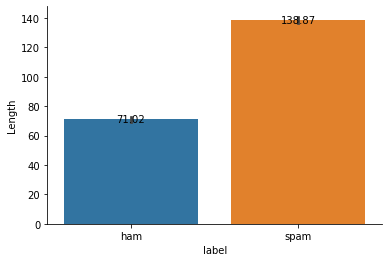

In [10]:
import numpy as np
count = df['label'].value_counts()
percent = count * 100/len(df)
ax=sns.barplot(x = 'label', y='Length', data =df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

# Section II  ( Remove Punctuations)


    Removing special character and numbers using regular expression
    Converting the entire sms into lower case
    Tokenizing the sms by words
    Removing the stop words
    Lemmatizing the words
    Joining the lemmatized words

In [11]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#creating word count feature as "word_count"
def word_count (str):
    """str --> int
    return the number of words appeared in a string
    """
    return len(str.split())
df['word_count'] = df.message.apply(word_count)

#creating character count feature as "char_count"
def char_count (str):
    """ str --> int
    return the number of character count of a string
    """
    return len(list(str))
df['char_count'] = df.message.apply(char_count)

#vew new data set
print(df.shape)
df.head()

(5572, 5)


,label,message,Length,word_count,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,111
1,ham,Ok lar... Joking wif u oni...,29,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,155
3,ham,U dun say so early hor... U c already then say...,49,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,61


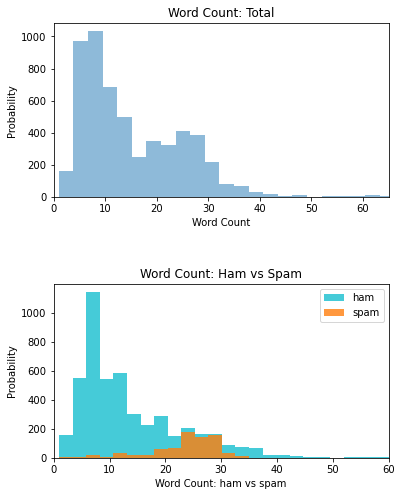

In [13]:
import matplotlib.pyplot as plt

#visualize word_count
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(df['word_count'], bins=60, color='#1f77b4', alpha=0.5)
plt.xlim(0,65)
plt.xlabel('Word Count')
plt.ylabel('Probability')
plt.title('Word Count: Total')
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((df.loc[df.label=='ham']['word_count'], df.loc[df.label=='spam']['word_count'])), bins=70)[1]
plt.hist(df.loc[df.label=='ham']['word_count'], bins,color='#17becf', alpha=0.8, label='ham')
plt.hist(df.loc[df.label=='spam']['word_count'], bins, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.xlabel('Word Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Word Count: Ham vs Spam')

ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
plt.subplots_adjust(hspace=0.5)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(df['message']).toarray()

# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

#Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

In [16]:
import pickle
# Creating a pickle file for the CountVectorizer
pickle.dump(vect, open('cv-transform.pkl', 'wb'))

# Training and test dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Machine Learning Models
1) Logistic Regression:95.33%
2) Multinomail Naive Bayes: 94.88%
3) KNN: 89.95%
4) Random Forest (Ensemble): 97.21%


### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
prediction = dict()
prediction['Logistic'] = model.predict(X_test)
accuracy_score(y_test,prediction['Logistic'])*100

96.95067264573991

### Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [21]:
prediction["Multinomial"] = model.predict(X_test)
accuracy_score(y_test,prediction["Multinomial"])*100

96.7713004484305

### KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
prediction['knn'] = model.predict(X_test)
accuracy_score(y_test,prediction['knn'])*100

93.72197309417041

### Random Forest Ensemble Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train) 
prediction['Random_Forest'] = model.predict(X_test)
print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, prediction['Random_Forest']))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       0.99      0.90      0.94       166

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [33]:
prediction["Random_Forest"] = model.predict(X_test)
accuracy_score(y_test,prediction["Random_Forest"])*100

98.38565022421525

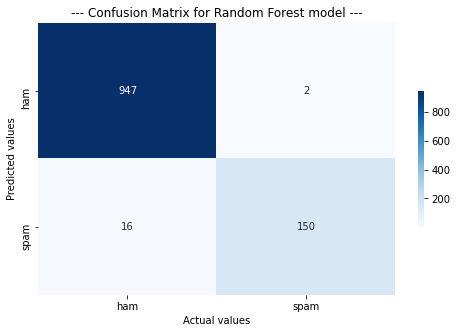

In [34]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, prediction["Random_Forest"])

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

In [35]:
# Create a pickle file using serialization
import pickle
pickle_out = open('RandomForest.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

# Model Evaluation

In [ ]:
print(classification_report(y_test, prediction['Random_Forest'], target_names = ["Ham", "Spam"]))

conf_mat = confusion_matrix(y_test, prediction['Random_Forest'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

In [ ]:
sns.heatmap(conf_mat_normalized,annot=True,fmt='.2%')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Predicting New message using Random Forest Classifier¶

In [30]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return model.predict(temp)

In [31]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.
